### Meng Wang

# MTH9875 Homework 11

Assigned: November 10, 2016.
Due: November 24, 2016 by 6pm.(Yes I know it's Thanksgiving!)

Late homework **will not be accepted**.

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### 0. (0 points)

Read Chapter 11 of The Volatility Surface

### As usual, set up your R-environment

The following code sources *BlackScholes.R* which has the Black-Scholes formula and implied volatility computation and *Heston2.R* which has in particular the *impvolHeston* function.

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/BlackScholes.R.zip", destfile="BlackScholes.R.zip")
unzip(zipfile="BlackScholes.R.zip")
source("BlackScholes.R")
source("Heston2.R")

## The gamma swap

### 1. (8 points)
$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
$$

Assume a stock process of the form

$$
\frac{dS_t}{S_t}=\sigma_t\,dZ_t
$$

where $\sigma_t$ may be stochastic.

A continuous time version of the payoff of a gamma swap is
$
\int_0^T\,S_t\,\sigma_t^2\,dt
$.

(a)

Compute $d(S_t\,\log S_t)$ using Itô's Lemma.

(b)

Deduce the semi-static model-free hedging strategy involving a static hedge in European options and continuous rebalancing in the stock. 

(c) 

Using the spanning formula, derive an expression for the weights of the options in the static hedge.

### Answers
(a)
$$
d\log S_t=\frac{1}{S_t}dS_t-\frac{1}{2S_t^2}dS_tdS_t=\sigma_tdZ_t-\frac{1}{2}\sigma_t^2dt
$$
$$
d(S_t\log S_t)=S_td\log S_t+\log S_tdS_t+dS_td\log S_t=\sigma_tS_t(1+\log S_t)dZ_t+\frac{1}{2}\sigma_t^2S_tdt=(1+\log S_t)dS_t+\frac{1}{2}\sigma_t^2S_tdt
$$
(b)
$$
S_T\log S_T-S_0\log S_0=\int_0^T (1+\log S_t)dS_t+\frac{1}{2}\int_0^T\sigma_t^2S_tdt
$$
$$
\int_0^T\sigma_t^2S_tdt=2S_T\log S_T-2S_0\log S_0-2\int_0^T (1+\log S_t)dS_t
$$
where $g(S_T)=2S_T\log S_T$ is the static hedge, $-2\int_0^T (1+\log S_t)dS_t$ is continuous rebalancing in the stock.

(c)
<br/>Spanning formula,
$$
g(S_T)=\int_0^F\,g''(K)\,(K-S_T)^+\,dK + \int_F^\infty\,g''(K)\,(S_T-K)^+\,dK\nonumber+ g(F)  + g'(F)\,(S_T-F)
$$
In this diffusion model, $F=S_0$.
$$
g'(S_T)=2\log S_T+2
$$
$$
g''(S_T)=\frac{2}{S_T}
$$
The weights of the options in static hedge is $1/K$.

## Demonstrate replication path-by-path

### 2. (10 points) 

(a)

Amend (for example) the stochastic volatility and local volatility Monte Carlo codes (*HestonMCxmax* and *HestonLvMCxmax* respectively) from Lecture 10, with the same HN parameters:

$$
\begin{eqnarray*} v&=& 0.04\\ \bar v &=& 0.04\\ \lambda&=&10\\
\eta&=&1\\\rho&=&-1
\end{eqnarray*}
$$

to demonstrate that the 
variance swap hedging strategy outlined on page 136 of *The
Volatility Surface* replicates the variance swap payoff path-by-path independently of the dynamical assumptions.  Assume a 1-year variance swap, use 252 time steps and 1,000 paths.  

(b) 

Compute the means and standard deviations of the hedging errors.

(c)

Draw histograms of the final replication errors under stochastic volatility and local volatility assumptions.

### Answers
(a)
$$
\log(S_T/F)=\int_0^T \frac{dS_T}{S_T}-\int_0^T \frac{\sigma_t^2}{2}dt
$$
Replication of the variance swap
$$
\int_0^T \frac{\sigma_t^2}{2}dt=2\int_0^T \frac{dS_T}{S_T}-2\log(S_T/F)
$$

In [2]:
HestonMCxmax <- function(params){

  is.even <- function(j){as.logical((j+1) %% 2)}
  
  res <- function(S0, T, AK, N, m, evolve,exactVols=NULL)
  {
    
    lambda <<- params$lambda 
    rho <<- params$rho 
    eta <<- params$eta 
    vbar <<- params$vbar 
    v0 <<- params$v 
    
    n <- m*2  #n is number of timesteps = 2*m so we can use Romberg extrapolation
    sqrt2 <- sqrt(2) 
    rho2m1 <<- sqrt(1-rho*rho) 
    vbarp <<- vbar - eta^2/(4*lambda) 
    
    negCount <- 0 
    
    # We use a vertical array, one element per M.C. path
    x <- numeric(N);  v <- rep(1,N)*v0  
    xmax <- x 
    xm <- x  
    vm <- v
    xmaxm <- xmax 
    xmin <- numeric(N)  
    xminm <- numeric(N) 
    W1m <- numeric(N) 
    W2m <- numeric(N)
    
    ### variance swap
    varswap<-numeric(N)
    varswap_rep<-numeric(N)
      
    
    # Loop for bias computation (N small, n big)
    for (i in 1:n)
    {
      # Two sets of correlated normal random vars.
      
      W1 <- rnorm(N) 
      W2 <- rnorm(N) 
      W1 <- W1 - mean(W1)
      W1 <- W1/sd(W1) 
      W2 <- W2 - mean(W2)
      W2 <- W2/sd(W2) 
      # Now W1 and W2 are forced to have mean=0 and sd=1
      
      W2p <- W2 - cor(W1,W2)*W1  # Eliminate actual correlation
      W2p <- W2p - mean(W2p)  
      W2 <- W2p/sd(W2p)  
      # Now W1 and W2 have mean=0, sd=1 and correlation=0
      
      L <- rbinom(N, size=1, prob=1/2)  # Bernoulli rv for NV step
      
      # Add code for subgrid
      W1m <- W1m + W1/sqrt2
      W2m <- W2m + W2/sqrt2  # N(0,1) rv's for subgrid
      
      if (is.even(i)) {
        #print(c(i,mean(W1m),mean(W2m),sd(W1m),sd(W2m),cor(W1m,W2m))) 
        resm <- evolve(vm,xm,T/m,W1m,W2m,L) 
        xnewm <- resm[,1] 
        xmaxm <- (xnewm>xmaxm)*(xnewm-xmaxm)+xmaxm 
        xminm <- (xnewm<xminm)*(xnewm-xminm)+xminm 
        xm <- xnewm 
        vm <- resm[,2] 
        W1m <- numeric(N)  
        W2m <- numeric(N) 
      }
      
      res <- evolve(v,x,T/n,W1,W2,L) 
      xnew <- res[,1] 
      xmax <- (xnew>xmax)*(xnew-xmax)+xmax 
      xmin <- (xnew<xmin)*(xnew-xmin)+xmin
      xold<-x
      x <- xnew 
      v <- res[,2]
      varswap<-varswap+v*T/n
      varswap_rep<-varswap_rep+(exp(x)-exp(xold))/exp(xold)
      
    }
    varswap_rep<-2*varswap_rep-2*log(exp(x)/S0)
      
    return(data.frame(x,xm,v,vm,xmax,xmaxm,xmin,xminm,varswap,varswap_rep)) 
    
  }
  return(res) 
}

# Monte Carlo with Richardson extrapolation
HestonLvMCxmax <- function(params){

  is.even <- function(j){as.logical((j+1) %% 2)}
  
  res <- function(S0, T, N, m)
  {
    
    lambda <- params$lambda;
    rho <- params$rho;
    eta <- params$eta;
    vbar <- params$vbar;
    v0 <- params$v;
    
    lambdap <- lambda+eta/2;
    vbarp <- vbar*lambda/lambdap;
    
    n <- m*2;
    dt <- T/n;
    dtm <- dt*2;
    
    sqrtdt <- sqrt(dt);
    sqrtdtm <- sqrt(dtm);
    sqrt2 <- sqrt(2);
    
    # We use a vertical array, one element per M.C. path
    x <- numeric(N); vloc <- rep(v0,N); 
    xm <- numeric(N); vlocm <- rep(v0,N); 
    xmax <- numeric(N); xmaxm <- numeric(N);
    xmin <- numeric(N); xminm <- numeric(N);
    W1m <- numeric(N);
      
    ### variance swap
    varswap<-numeric(N)
    varswap_rep<-numeric(N)
    
    # Loop over timesteps
    for (i in 1:n)
    {
      W1 <- rnorm(N);
      W1 <- W1 - mean(W1); W1 <- W1/sd(W1);
      # Now W1 is forced to have mean=0 and sd=1  
      
      # Add code for subgrid
      W1m <- W1m + W1/sqrt2; # N(0,1) rv's for subgrid
      
      # Compute local variance from formula 4.1 of TVS
      ti <- i*dt;
      elti <- exp(-lambdap*ti);	
      vlocf <- (v0-vbarp)*elti+vbarp-eta*x*(1-elti)/(lambdap*ti);
      vlocf <- (vlocf>=0)*vlocf;
      
      # Approximate integrated variance
      w <- (vlocf +vloc)/2*dt;
      
      xnew <- x - w/2 + sqrt(w)*W1;
      xmax <- (xnew>xmax)*(xnew-xmax)+xmax;
      xmin <- (xnew<xmin)*(xnew-xmin)+xmin;
      xold<-x
      x <- xnew;
      vloc <- vlocf;
      
      varswap<-varswap+vloc*T/n
      varswap_rep<-varswap_rep+(exp(xnew)-exp(xold))/exp(xold)
      
      
      if (is.even(i)) {
        
        vlocfm <- (v0-vbarp)*elti+vbarp-eta*xm*(1-elti)/(lambdap*ti);
        vlocfm <- (vlocfm>=0)*vlocfm;
        
        wm <- (vlocfm+vlocm)/2*dtm;
        xnewm <- xm - wm/2 + sqrt(wm)*W1m;
        xmaxm <- (xnewm>xmaxm)*(xnewm-xmaxm)+xmaxm;
        xminm <- (xnewm<xminm)*(xnewm-xminm)+xminm;
        xm <- xnewm;
        vlocm <- vlocf;
        W1m <- numeric(N);
      } 
      
      
    }
    
    varswap_rep<-2*varswap_rep-2*log(exp(x)/S0)
    
    return(data.frame(x,xm,vloc,vlocm,xmax,xmaxm,xmin, xminm,varswap,varswap_rep));
    
  }
  return(res);
}

### HN parameters
paramsCh4 <- list(lambda = 10,rho = -1,eta = 1,vbar = 0.04,v = 0.04)

### evolve function
evolveAlfonsiF <- function(v,x,dt,W1,W2,L){
  
  eldt2 <- exp(-lambda*dt/2);
  
  #Variance process 
  vbarp <- vbar - eta^2/(4*lambda);
  psi <- (1-eldt2)/lambda;
  v1 <- v*eldt2+lambda*vbarp*psi;
  v2 <- (v1 > 0) * v1; # Take v2 = 0 if v1<0, else v2=v1
  par <- sqrt(v2) + eta/2 * sqrt(dt)*W2;
  vf <- eldt2*par*par +lambda*vbarp*psi + v1 - v2;
  # Full truncation
  
  # Log-stock process (Andersen equation (33))
  vvf <- (v+vf > 0) * (v+vf);
  dw <- vvf/2*dt;
  x <- x  - dw/2 + rho2m1*sqrt(dw)*W1 +
    rho/eta*(lambda*dw + vf-v -lambda*vbar*dt) ;
  # Impose martingale constraint
  x <- x - log(mean(exp(x)));
  v <- vf;
  return(cbind(x,v));
}

In [3]:
sampleLV <- HestonLvMCxmax(paramsCh4)(S0=1, T=1, N=1000, m=252/2)
sampleSV <- HestonMCxmax(paramsCh4)(S0=1, T=1, N=1000, m=252/2,evolve=evolveAlfonsiF)

In [4]:
varswapLV<-mean(sampleLV$varswap)
varswapLV_rep<-mean(sampleLV$varswap_rep)
varswapSV<-mean(sampleSV$varswap)
varswapSV_rep<-mean(sampleSV$varswap_rep)
res<-data.frame(matrix(ncol=4,nrow=2))
res[1,]<-c("local vol MC",varswapLV,varswapLV_rep,varswapLV_rep-varswapLV)
res[2,]<-c("stochastic vol MC",varswapSV,varswapSV_rep,varswapSV_rep-varswapSV)
colnames(res)<-c("MC","variance swap","variance swap replicated","hedging error")
res

MC,variance swap,variance swap replicated,hedging error
local vol MC,0.0399542986461419,0.0399196709205462,-3.46277255957178e-05
stochastic vol MC,0.0399079805409818,0.0398930644101398,-1.49161308419729e-05


(b)

In [5]:
res1<-data.frame(matrix(ncol=3,nrow=2))
res1[1,]<-c("local vol MC",varswapLV_rep-varswapLV,sd(sampleLV$varswap_rep-sampleLV$varswap))
res1[2,]<-c("stochastic vol MC",varswapSV_rep-varswapSV,sd(sampleSV$varswap_rep-sampleSV$varswap))
colnames(res1)<-c("MC","mean of heding error","std of hedging error")
res1

MC,mean of heding error,std of hedging error
local vol MC,-3.46277255957178e-05,0.00432356527448704
stochastic vol MC,-1.49161308419729e-05,0.00526136055793631


(c)

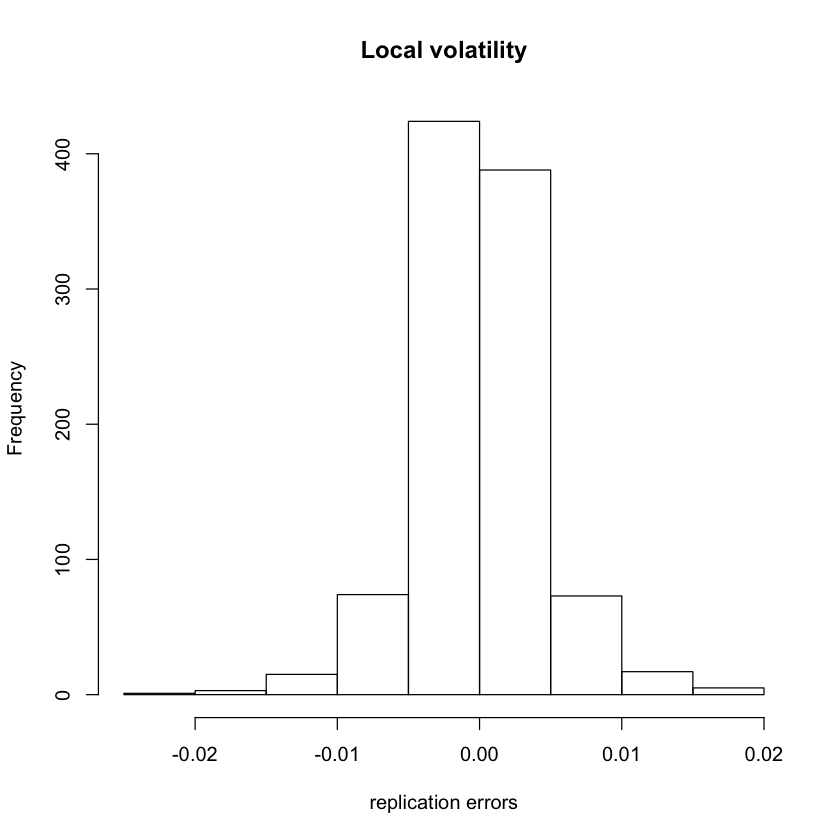

In [6]:
hist(sampleLV$varswap_rep-sampleLV$varswap, main="Local volatility", xlab="replication errors")

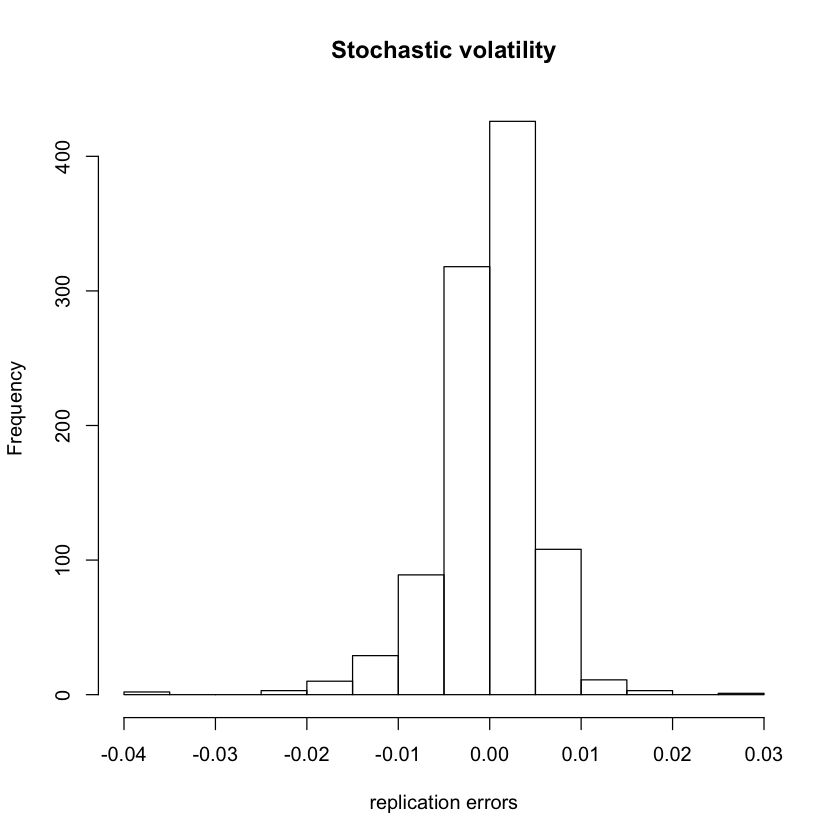

In [25]:
hist(sampleSV$varswap_rep-sampleSV$varswap, main="Stochastic volatility", xlab="replication errors")

### 3. (6 points) 

Repeat Problem 2 for a gamma swap with the static hedge you derived for the gamma swap in Problem 1.

### Answers
(a)
$$
\int_0^T\sigma_t^2S_tdt=2S_T\log S_T-2S_0\log S_0-2\int_0^T (1+\log S_t)dS_t
$$

In [7]:
HestonMCxmax <- function(params){

  is.even <- function(j){as.logical((j+1) %% 2)}
  
  res <- function(S0, T, AK, N, m, evolve,exactVols=NULL)
  {
    
    lambda <<- params$lambda 
    rho <<- params$rho 
    eta <<- params$eta 
    vbar <<- params$vbar 
    v0 <<- params$v 
    
    n <- m*2  #n is number of timesteps = 2*m so we can use Romberg extrapolation
    sqrt2 <- sqrt(2) 
    rho2m1 <<- sqrt(1-rho*rho) 
    vbarp <<- vbar - eta^2/(4*lambda) 
    
    negCount <- 0 
    
    # We use a vertical array, one element per M.C. path
    x <- numeric(N);  v <- rep(1,N)*v0  
    xmax <- x 
    xm <- x  
    vm <- v
    xmaxm <- xmax 
    xmin <- numeric(N)  
    xminm <- numeric(N) 
    W1m <- numeric(N) 
    W2m <- numeric(N)
    
    ### gamma swap
    gammaswap<-numeric(N)
    gammaswap_rep<-numeric(N)
      
    
    # Loop for bias computation (N small, n big)
    for (i in 1:n)
    {
      # Two sets of correlated normal random vars.
      
      W1 <- rnorm(N) 
      W2 <- rnorm(N) 
      W1 <- W1 - mean(W1)
      W1 <- W1/sd(W1) 
      W2 <- W2 - mean(W2)
      W2 <- W2/sd(W2) 
      # Now W1 and W2 are forced to have mean=0 and sd=1
      
      W2p <- W2 - cor(W1,W2)*W1  # Eliminate actual correlation
      W2p <- W2p - mean(W2p)  
      W2 <- W2p/sd(W2p)  
      # Now W1 and W2 have mean=0, sd=1 and correlation=0
      
      L <- rbinom(N, size=1, prob=1/2)  # Bernoulli rv for NV step
      
      # Add code for subgrid
      W1m <- W1m + W1/sqrt2
      W2m <- W2m + W2/sqrt2  # N(0,1) rv's for subgrid
      
      if (is.even(i)) {
        #print(c(i,mean(W1m),mean(W2m),sd(W1m),sd(W2m),cor(W1m,W2m))) 
        resm <- evolve(vm,xm,T/m,W1m,W2m,L) 
        xnewm <- resm[,1] 
        xmaxm <- (xnewm>xmaxm)*(xnewm-xmaxm)+xmaxm 
        xminm <- (xnewm<xminm)*(xnewm-xminm)+xminm 
        xm <- xnewm 
        vm <- resm[,2] 
        W1m <- numeric(N)  
        W2m <- numeric(N) 
      }
      
      res <- evolve(v,x,T/n,W1,W2,L) 
      xnew <- res[,1] 
      xmax <- (xnew>xmax)*(xnew-xmax)+xmax 
      xmin <- (xnew<xmin)*(xnew-xmin)+xmin
      xold<-x
      x <- xnew 
      v <- res[,2]
      gammaswap<-gammaswap+v*exp(x)*T/n
      gammaswap_rep<-gammaswap_rep+(1+xold)*(exp(xnew)-exp(xold))
      
    }
    gammaswap_rep<-2*exp(x)*x-2*S0*log(S0)-2*gammaswap_rep
      
    return(data.frame(x,xm,v,vm,xmax,xmaxm,xmin,xminm,gammaswap,gammaswap_rep)) 
    
  }
  return(res) 
}

# Monte Carlo with Richardson extrapolation
HestonLvMCxmax <- function(params){

  is.even <- function(j){as.logical((j+1) %% 2)}
  
  res <- function(S0, T, N, m)
  {
    
    lambda <- params$lambda;
    rho <- params$rho;
    eta <- params$eta;
    vbar <- params$vbar;
    v0 <- params$v;
    
    lambdap <- lambda+eta/2;
    vbarp <- vbar*lambda/lambdap;
    
    n <- m*2;
    dt <- T/n;
    dtm <- dt*2;
    
    sqrtdt <- sqrt(dt);
    sqrtdtm <- sqrt(dtm);
    sqrt2 <- sqrt(2);
    
    # We use a vertical array, one element per M.C. path
    x <- numeric(N); vloc <- rep(v0,N); 
    xm <- numeric(N); vlocm <- rep(v0,N); 
    xmax <- numeric(N); xmaxm <- numeric(N);
    xmin <- numeric(N); xminm <- numeric(N);
    W1m <- numeric(N);
      
    ### gamma swap
    gammaswap<-numeric(N)
    gammaswap_rep<-numeric(N)
    
    # Loop over timesteps
    for (i in 1:n)
    {
      W1 <- rnorm(N);
      W1 <- W1 - mean(W1); W1 <- W1/sd(W1);
      # Now W1 is forced to have mean=0 and sd=1  
      
      # Add code for subgrid
      W1m <- W1m + W1/sqrt2; # N(0,1) rv's for subgrid
      
      # Compute local variance from formula 4.1 of TVS
      ti <- i*dt;
      elti <- exp(-lambdap*ti);	
      vlocf <- (v0-vbarp)*elti+vbarp-eta*x*(1-elti)/(lambdap*ti);
      vlocf <- (vlocf>=0)*vlocf;
      
      # Approximate integrated variance
      w <- (vlocf +vloc)/2*dt;
      
      xnew <- x - w/2 + sqrt(w)*W1;
      xmax <- (xnew>xmax)*(xnew-xmax)+xmax;
      xmin <- (xnew<xmin)*(xnew-xmin)+xmin;
      xold<-x
      x <- xnew;
      vloc <- vlocf;
      
      gammaswap<-gammaswap+vloc*exp(x)*T/n
      gammaswap_rep<-gammaswap_rep+(1+xold)*(exp(xnew)-exp(xold))
      
      
      if (is.even(i)) {
        
        vlocfm <- (v0-vbarp)*elti+vbarp-eta*xm*(1-elti)/(lambdap*ti);
        vlocfm <- (vlocfm>=0)*vlocfm;
        
        wm <- (vlocfm+vlocm)/2*dtm;
        xnewm <- xm - wm/2 + sqrt(wm)*W1m;
        xmaxm <- (xnewm>xmaxm)*(xnewm-xmaxm)+xmaxm;
        xminm <- (xnewm<xminm)*(xnewm-xminm)+xminm;
        xm <- xnewm;
        vlocm <- vlocf;
        W1m <- numeric(N);
      } 
      
      
    }
    
    gammaswap_rep<-2*exp(x)*x-2*S0*log(S0)-2*gammaswap_rep
    
    return(data.frame(x,xm,vloc,vlocm,xmax,xmaxm,xmin, xminm,gammaswap,gammaswap_rep));
    
  }
  return(res);
}

### HN parameters
paramsCh4 <- list(lambda = 10,rho = -1,eta = 1,vbar = 0.04,v = 0.04)

### evolve function
evolveAlfonsiF <- function(v,x,dt,W1,W2,L){
  
  eldt2 <- exp(-lambda*dt/2);
  
  #Variance process 
  vbarp <- vbar - eta^2/(4*lambda);
  psi <- (1-eldt2)/lambda;
  v1 <- v*eldt2+lambda*vbarp*psi;
  v2 <- (v1 > 0) * v1; # Take v2 = 0 if v1<0, else v2=v1
  par <- sqrt(v2) + eta/2 * sqrt(dt)*W2;
  vf <- eldt2*par*par +lambda*vbarp*psi + v1 - v2;
  # Full truncation
  
  # Log-stock process (Andersen equation (33))
  vvf <- (v+vf > 0) * (v+vf);
  dw <- vvf/2*dt;
  x <- x  - dw/2 + rho2m1*sqrt(dw)*W1 +
    rho/eta*(lambda*dw + vf-v -lambda*vbar*dt) ;
  # Impose martingale constraint
  x <- x - log(mean(exp(x)));
  v <- vf;
  return(cbind(x,v));
}

In [8]:
sampleLV <- HestonLvMCxmax(paramsCh4)(S0=1, T=1, N=1000, m=252/2)
sampleSV <- HestonMCxmax(paramsCh4)(S0=1, T=1, N=1000, m=252/2,evolve=evolveAlfonsiF)

In [9]:
gammaswapLV<-mean(sampleLV$gammaswap)
gammaswapLV_rep<-mean(sampleLV$gammaswap_rep)
gammaswapSV<-mean(sampleSV$gammaswap)
gammaswapSV_rep<-mean(sampleSV$gammaswap_rep)
res<-data.frame(matrix(ncol=4,nrow=2))
res[1,]<-c("local vol MC",gammaswapLV,gammaswapLV_rep,gammaswapLV_rep-gammaswapLV)
res[2,]<-c("stochastic vol MC",gammaswapSV,gammaswapSV_rep,gammaswapSV_rep-gammaswapSV)
colnames(res)<-c("MC","gamma swap","gamma swap replicated","hedging error")
res

MC,gamma swap,gamma swap replicated,hedging error
local vol MC,0.0366894089576671,0.0367432255480742,5.38165904071172e-05
stochastic vol MC,0.0368455978973328,0.0368018135250924,-4.37843722403478e-05


(b)

In [10]:
res1<-data.frame(matrix(ncol=3,nrow=2))
res1[1,]<-c("local vol MC",gammaswapLV_rep-gammaswapLV,sd(sampleLV$gammaswap_rep-sampleLV$gammaswap))
res1[2,]<-c("stochastic vol MC",gammaswapSV_rep-gammaswapSV,sd(sampleSV$gammaswap_rep-sampleSV$gammaswap))
colnames(res1)<-c("MC","mean of heding error","std of hedging error")
res1

MC,mean of heding error,std of hedging error
local vol MC,5.38165904071172e-05,0.00367774392667476
stochastic vol MC,-4.37843722403478e-05,0.0044956104328818


(c)

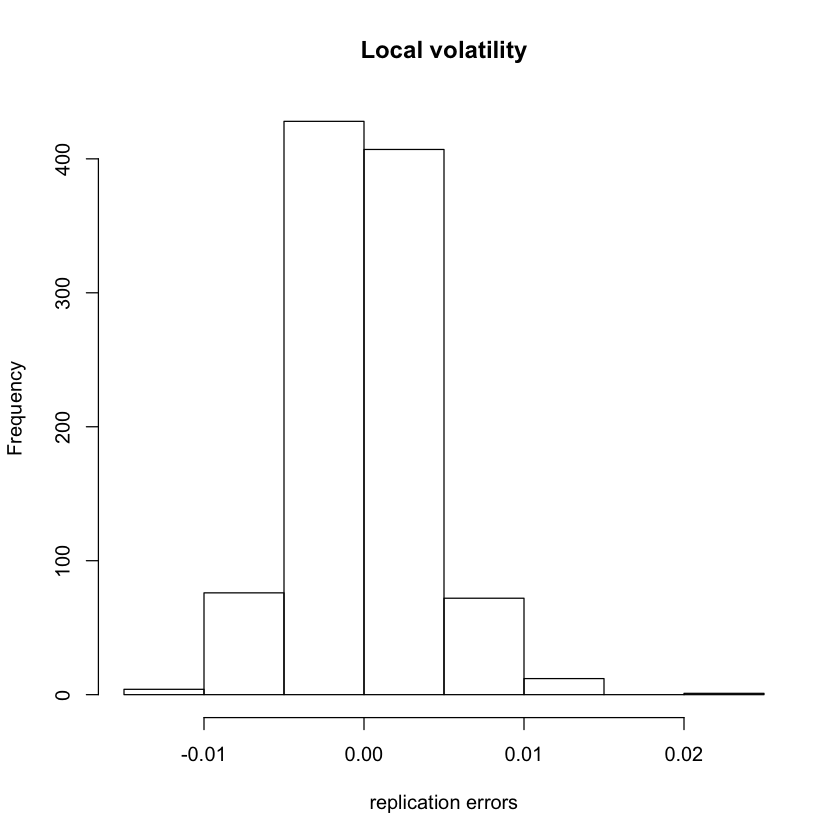

In [11]:
hist(sampleLV$gammaswap_rep-sampleLV$gammaswap, main="Local volatility", xlab="replication errors")

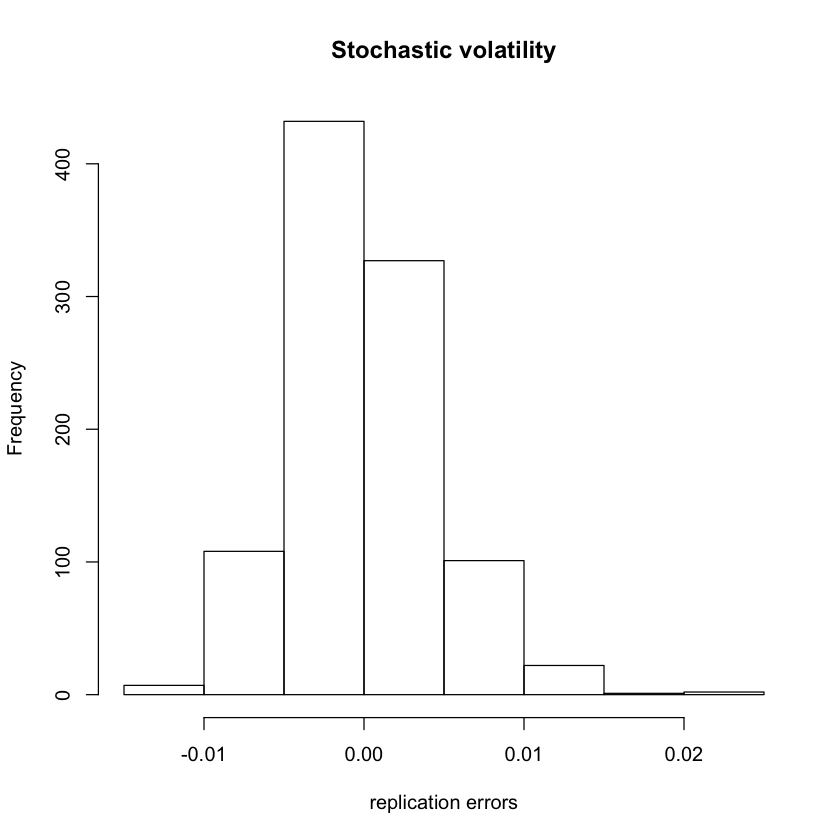

In [12]:
hist(sampleSV$gammaswap_rep-sampleSV$gammaswap, main="Stochastic volatility", xlab="replication errors")